#S5101 ML Capstone project credit card approval



#Introduction

Credit cards are essential in modern finance, providing consumers with a convenient way to make transactions without immediate cash. However, challenges in responsible lending, credit assessments, and risk management require sophisticated models. Striking a balance is crucial for organizations to establish a mutually beneficial relationship with customers through credit card offerings.
Machine learning models can predict credit card approval by analyzing historical data to identify patterns and assess creditworthiness.
This project aims to explore the intricate relationship between parameters and credit card acceptance. Through a thorough investigation, we seek to reveal patterns. The project implements predictive models using advanced analytical techniques and machine learning, enhancing credit card approval precision and optimizing decision-making for more accurate predictions and improved risk management strategies.

#1-Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

the significance of our proposal becomes evident. Predictive models play a pivotal role in today's world, offering banks a strategic advantage in discerning good clients. By accurately forecasting credit card approvals, financial institutions can minimize risks, ensuring a portfolio comprised of responsible individuals. This not only boosts profitability by reducing defaults but also cultivates a healthier credit profile.
 Moreover, precise predictions streamline the approval process, elevating customer satisfaction and loyalty. Our proposal is essential for banks seeking informed decision-making, optimal resource utilization, and adaptability in the ever-evolving financial sphere.



#2-How is it going to impact the banking sector?
Implementing predictive models for credit card approval will have a transformative impact on the banking sector. The accurate identification of creditworthy clients will enable banks to enhance risk management practices, significantly reducing the likelihood of defaults. This, in turn, contributes to a more stable and profitable credit portfolio. The streamlined approval process will improve operational efficiency, leading to faster decision-making and increased customer satisfaction.
Ultimately, the integration of advanced analytics and machine learning in credit card approval processes will position banks to make more informed, efficient, and strategic decisions, fostering a positive impact on their overall performance and competitiveness in the financial industry.

#3-If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

The potential knowledge gap lies in the traditional credit assessment methods used by banks in India, which may not fully harness the capabilities of advanced analytics and machine learning. Our proposed method addresses this gap by introducing a more data-driven and predictive approach to credit card approval.
The proposed method has the potential to revolutionize credit approval processes, offering a more efficient and forward-looking solution that aligns with the increasing complexity of financial landscapes, thereby enabling Indian banks to adapt and thrive in the future.


##Features name
###From Credit_card.csv

**Ind_ID**: Client ID

**Gender:** Gender information

**Car_owner:** Having car or not

**Propert_owner:** Having property or not

**Children:** Count of children

**Annual_income:** Annual income

**Type_Income:** Income type

**Education:** Education level

**Marital_status:** Marital_status

**Housing_type:** Living style

**Birthday_count:** Use backward count from current day (0), -1 means yesterday.

**Employed_days:** Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

**Mobile_phone:** Any mobile phone

**Work_phone:** Any work phone

**Phone:** Any phone number

**EMAIL_ID:** Any email ID

**Type_Occupation:** Occupation

**Family_Members:** Family size


##From Credit_card_label.csv

**ID:** The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.


#Importing all the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

#Load data

In [ ]:
#Loading the datasets
df= pd.read_csv("/content/Credit_card.csv")
df1= pd.read_csv("/content/Credit_card_label.csv")

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
df1.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
#merging the datasets
data = pd.merge(df,df1)

#Exploratory Data Analysis (EDA)

In [ ]:
#checking the basic info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
#checking for the null values
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
#checking the shape of data
data.shape

(1548, 19)

In [ ]:
#correcting the columns data
data['Birthday_count'] = data['Birthday_count'].abs()
data['Employed_days'] = data['Employed_days'].abs()

In [ ]:
#check the top 5 rows the dataframe
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,13557.0,586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,586,1,1,1,0,NaN,2,1


In [ ]:
#checking the bottom 5 rows of the dataframe
data.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,11957.0,2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,10229.0,1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,13174.0,2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,15292.0,645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,16601.0,2859,1,0,0,0,NaN,2,0


<ipython-input-170-c6412a417799>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Annual_income', ylabel='Density'>

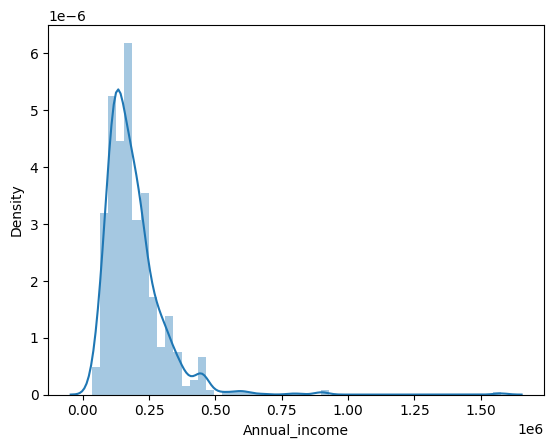

In [ ]:
#checking the skewness of column to fill the null values with mean/median
sns.distplot(data['Annual_income'])


<ipython-input-171-b5cb8072807f>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Birthday_count', ylabel='Density'>

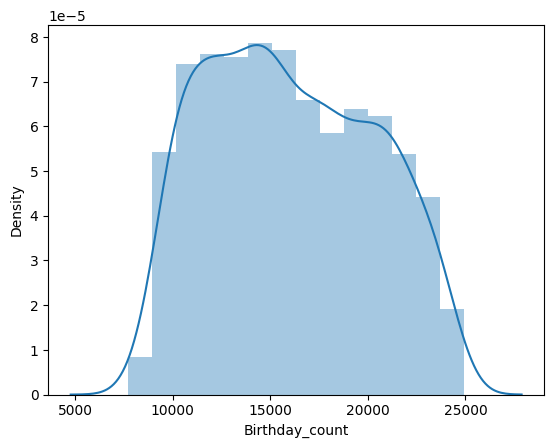

In [ ]:
#checking the skewness of column to fill the null values with mean/median
sns.distplot(data['Birthday_count'])

In [ ]:
#fill the null values with median as there is skewness
data.fillna(data.median(), inplace=True)

<ipython-input-172-97c6285b31a1>:2: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
#checking the datatypes of all columns
data.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [ ]:
#filling the null values of type occupations with self employed
data["Type_Occupation"].fillna("self employed", inplace = True)

In [ ]:
#filling the null values with mode data in gender column
data["GENDER"].fillna(data.mode, inplace = True)


In [ ]:
#checking the null values of all columns
data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
#checking for the duplicates in data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1543    False
1544    False
1545    False
1546    False
1547    False
Length: 1548, dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [ ]:
#checking mean,median,max,std deviation,count
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.910294e+05,16034.958010,63798.647287,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.124483e+05,4199.561035,135810.927959,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,7705.000000,73.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,12483.000000,1161.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,15661.500000,2479.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,19476.000000,6043.500000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,24946.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


#checking for outliers


In [ ]:
#interquartile range
q1=1161
q3=6043.5
iqr=q3-q1
iqr

4882.5

In [ ]:
#minimum and maximum range of data
max_ed=q3+(1.5*iqr)
min_ed=q1-(1.5*iqr)
print(max_ed)
print(min_ed)

13367.25
-6162.75


<Axes: >

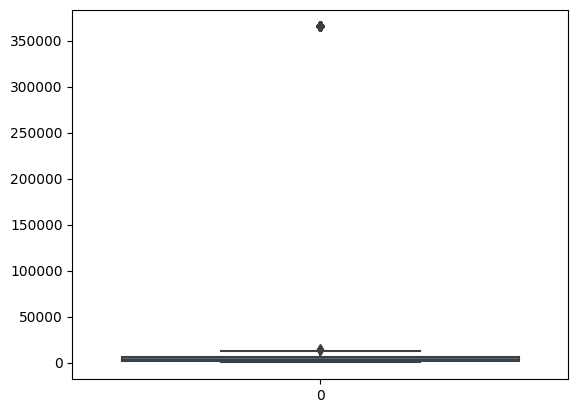

In [ ]:
#boxplot to check the outlier
sns.boxplot(data["Employed_days"])

In [ ]:
#fixing the outlier value
data["Employed_days"] = np.where(data["Employed_days"]>max_ed,max_ed, data["Employed_days"])
data["Employed_days"]

0       13367.25
1         586.00
2         586.00
3         586.00
4         586.00
          ...   
1543     2182.00
1544     1209.00
1545     2477.00
1546      645.00
1547     2859.00
Name: Employed_days, Length: 1548, dtype: float64

<Axes: >

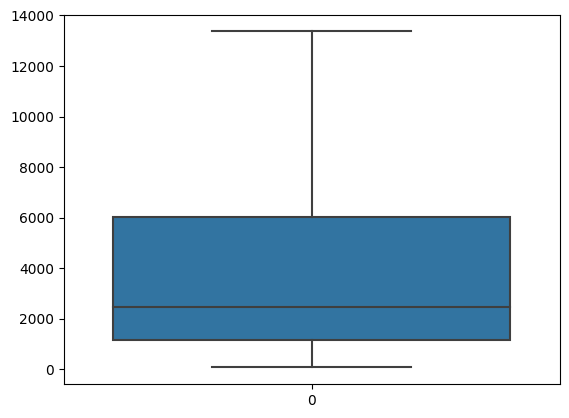

In [ ]:
#The plot After outlier fixetation
sns.boxplot(data["Employed_days"])

4.5
0.5


<Axes: >

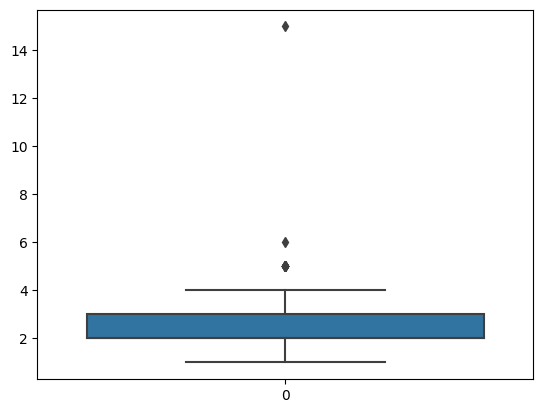

In [ ]:
Q1=2
Q3=3
IQR=Q3-Q1
Max_ed=Q3+(1.5*IQR)
Min_ed=Q1-(1.5*IQR)
print(Max_ed)
print(Min_ed)
sns.boxplot(data["Family_Members"])

In [ ]:
max=5 #taking this as  max value as there are only 2 values which are greater then 5
data["Family_Members"] = np.where(data["Family_Members"]>max,max, data["Family_Members"])
data["Family_Members"]

0       2
1       2
2       2
3       2
4       2
       ..
1543    2
1544    1
1545    4
1546    2
1547    2
Name: Family_Members, Length: 1548, dtype: int64

<Axes: >

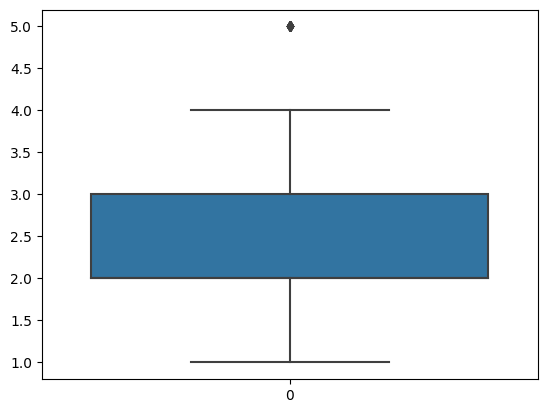

In [ ]:
sns.boxplot(data["Family_Members"])

#SQL QUERIES TO GET SOME OUTPUTS

#using the sql queries to get info

In [ ]:
#Module to execute SQL queries in python
import duckdb
conn=duckdb.connect()

In [ ]:
conn.register("df",data)

In [ ]:
#give output as all the data
conn.execute("select * from df").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,18772.0,13367.25,1,0,0,0,self employed,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,586.00,1,1,1,0,self employed,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,15661.5,586.00,1,1,1,0,self employed,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,13557.0,586.00,1,1,1,0,self employed,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,586.00,1,1,1,0,self employed,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,11957.0,2182.00,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,10229.0,1209.00,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,13174.0,2477.00,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,15292.0,645.00,1,1,1,0,Drivers,2,0


1.Group the customers based on their income type and find the average of their annual income.

In [ ]:
conn.execute("select count(*)as grouped,type_income,round(avg(annual_income),0)as avg_income_dept from df group by Type_Income ").fetchdf()

,grouped,Type_Income,avg_income_dept
0,269,Pensioner,155343.0
1,798,Working,180848.0
2,116,State servant,211422.0
3,365,Commercial associate,233107.0


2.Find the female owners of cars and property.

In [ ]:
conn.execute("select * from df where gender = 'F' and Car_Owner = 'Y' and Propert_Owner='Y'").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,18950.0,1002.00,1,1,1,0,Cooking staff,2,1
1,5018501,F,Y,Y,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,18950.0,1002.00,1,1,1,0,Cooking staff,2,1
2,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,18950.0,1002.00,1,1,1,0,Cooking staff,2,1
3,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,15702.0,185.00,1,0,1,0,self employed,2,1
4,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,23835.0,13367.25,1,0,0,0,self employed,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5048458,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,9441.0,157.00,1,0,0,0,self employed,3,0
173,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,22077.0,13367.25,1,0,1,0,self employed,2,0
174,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,12559.0,5862.00,1,0,1,0,Medicine staff,5,0
175,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,12903.0,2924.00,1,0,0,0,Accountants,3,0


3.Find the male customers who are staying with their families.

In [ ]:
conn.execute("select * from df where Gender='M'and Housing_type='With parents'").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,8907.0,913.0,1,0,0,1,self employed,3,1
1,5079166,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,13720.0,1394.0,1,0,0,0,Laborers,2,1
2,5079167,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,13720.0,1394.0,1,0,0,0,Laborers,2,1
3,5079168,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,13720.0,1394.0,1,0,0,0,Laborers,2,1
4,5050729,M,Y,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,8528.0,531.0,1,0,0,0,self employed,1,0
5,5028383,M,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,With parents,11344.0,3309.0,1,0,0,0,Core staff,1,0
6,5143019,M,N,N,0,270000.0,Working,Secondary / secondary special,Married,With parents,11768.0,622.0,1,1,1,0,Laborers,2,0
7,5067982,M,Y,Y,0,153000.0,Working,Higher education,Separated,With parents,20013.0,7640.0,1,0,0,1,Managers,1,0
8,5143573,M,Y,N,0,157500.0,Working,Incomplete higher,Married,With parents,9124.0,960.0,1,1,0,0,Drivers,2,0
9,5038751,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,With parents,14192.0,626.0,1,0,0,0,Drivers,4,0


4.Please list the top five people having the highest income.



In [ ]:
conn.execute("select * from df order by Annual_income desc limit 5").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,10142.0,2479.0,1,0,0,0,Managers,2,0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,10142.0,2479.0,1,0,0,0,Managers,2,0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,15380.0,4509.0,1,0,0,0,Laborers,3,0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,9889.0,1000.0,1,0,0,0,Managers,4,0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,9889.0,1000.0,1,0,0,0,Managers,4,0


5.How many married people are having bad credit?

In [ ]:
conn.execute("select * from df where Marital_status='Married' and label = 1").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,18772.0,13367.25,1,0,0,0,self employed,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,586.00,1,1,1,0,self employed,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,15661.5,586.00,1,1,1,0,self employed,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,13557.0,586.00,1,1,1,0,self employed,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,586.00,1,1,1,0,self employed,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,5149190,M,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,9847.0,502.00,1,0,1,1,Core staff,3,1
110,5149192,<bound method DataFrame.mode of Ind_ID ...,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,9847.0,502.00,1,0,1,1,Core staff,3,1
111,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,17348.0,2420.00,1,0,0,0,Managers,2,1
112,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,12387.0,1325.00,1,0,1,1,Medicine staff,2,1


6.What is the highest education level and what is the total count?

In [ ]:
conn.execute("select count(*)as Education_grp_count,EDUCATION from df group by EDUCATION ").fetchdf()

,Education_grp_count,EDUCATION
0,68,Incomplete higher
1,2,Academic degree
2,426,Higher education
3,1031,Secondary / secondary special
4,21,Lower secondary


7.Between married males and females, who is having more bad credit?

In [ ]:
conn.execute("select count(*)as bad_credit_count,Gender from df where label = 1 group by gender ").fetchdf()

,bad_credit_count,GENDER
0,75,M
1,95,F
2,5,<bound method DataFrame.mode of Ind_ID ...


#Data visualization

people who owns car 
 N    924
Y    624
Name: Car_Owner, dtype: int64


<Axes: xlabel='Car_Owner', ylabel='count'>

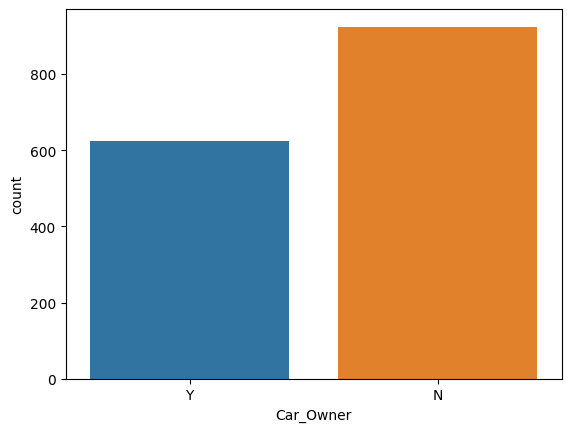

In [ ]:
#countplot to show the count of people who owns car
category_counts = df['Car_Owner'].value_counts()
print("people who owns car \n",category_counts)
sns.countplot(x='Car_Owner',data=data)

marital status  
 Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64


<Axes: xlabel='Marital_status', ylabel='count'>

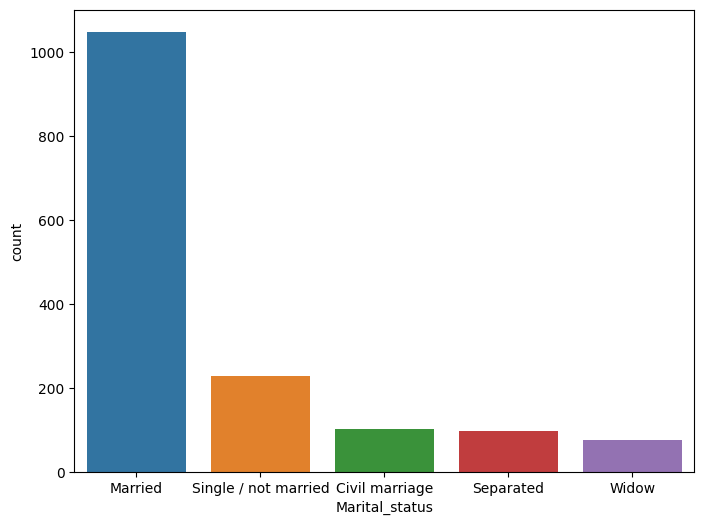

In [ ]:
##countplot to see the count of people's marital status
plt.figure(figsize=(8,6))
category_counts = df['Marital_status'].value_counts()
print("marital status  \n",category_counts)
sns.countplot(x='Marital_status',data=data)

total members in family 
 2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64


<Axes: xlabel='Family_Members', ylabel='count'>

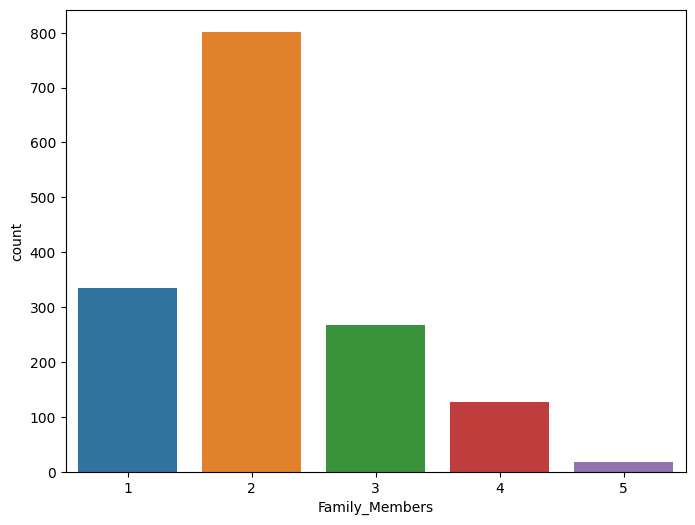

In [ ]:
#countplot to show the family members
plt.figure(figsize=(8,6))
category_counts = df['Family_Members'].value_counts()
print("total members in family \n",category_counts)
sns.countplot(x='Family_Members',data=data)

In [ ]:
#pie chart for education level
fig = px.pie(data, names='EDUCATION',title = "Division by Education level")
fig.show()

In [ ]:
#distribution  count of employed days
plt.figure(figsize=(8,6))
fig = px.histogram(data, x="Employed_days",width=800,nbins=20,
             height=400)
fig.show()

<Figure size 800x600 with 0 Axes>

In [ ]:
#distribution of annual income
fig = px.histogram(data, x="Annual_income",width=800,nbins=100,
             height=400)
fig.show()

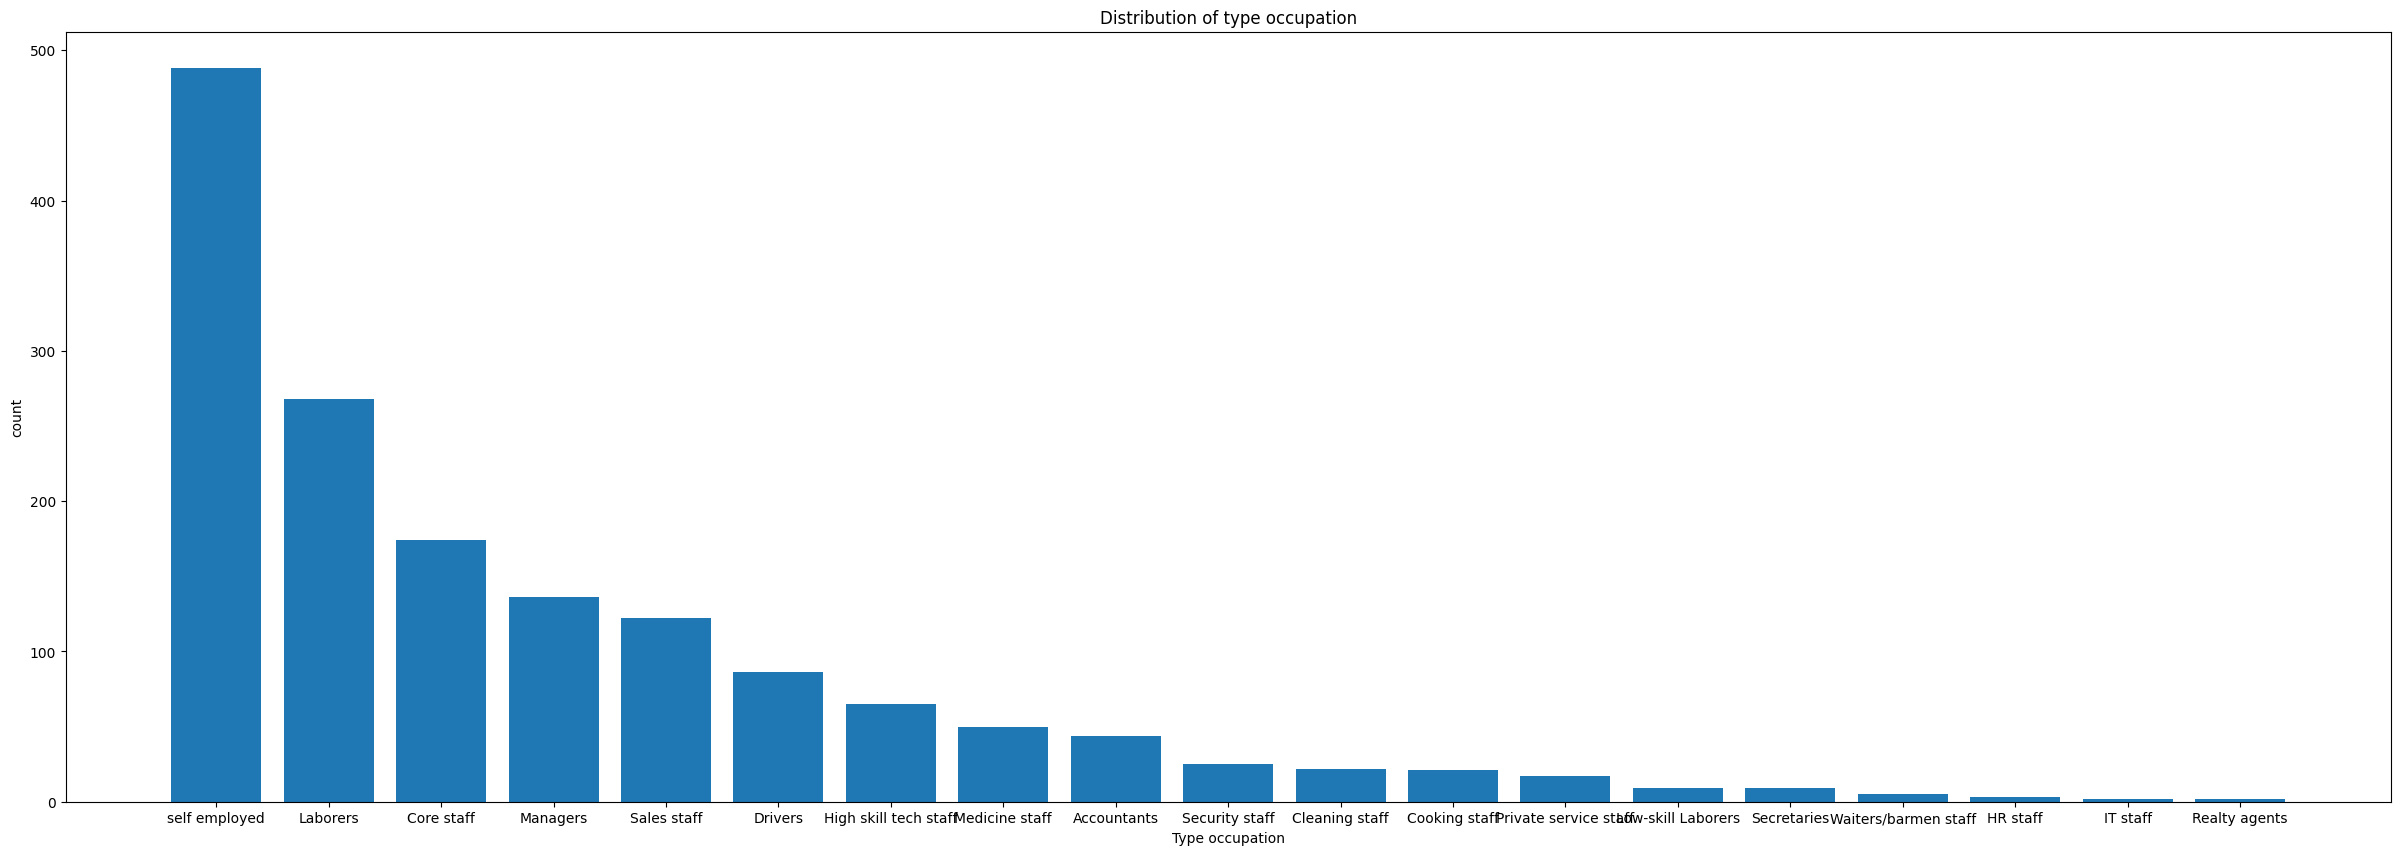

In [ ]:
#count of type of occupation
income_count = data['Type_Occupation'].value_counts()
plt.figure(figsize=(30,10))
plt.bar(income_count.index, income_count.values)
plt.xlabel('Type occupation')
plt.ylabel('count')
plt.title('Distribution of type occupation')
plt.show()

In [ ]:
#percentage of people's income source
fig = px.pie(data, names='Type_Income',title = "type of income")
fig.show()

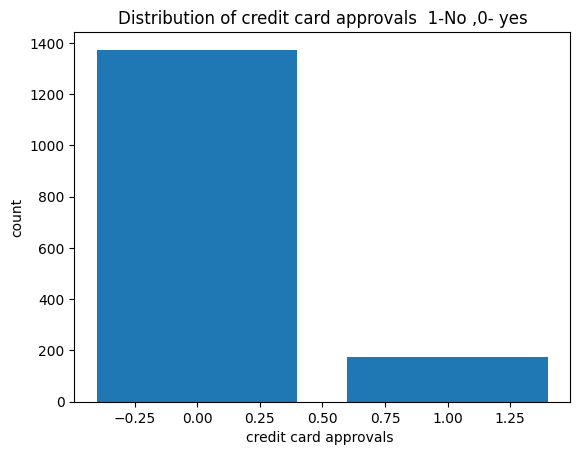

In [ ]:
# credit card possesion count
credit_count = data['label'].value_counts()
plt.bar(credit_count.index, credit_count.values)
plt.xlabel('credit card approvals ')
plt.ylabel('count')
plt.title('Distribution of credit card approvals  1-No ,0- yes')
plt.show()

#Feature Engineering


<ipython-input-206-a37ea1de0112>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



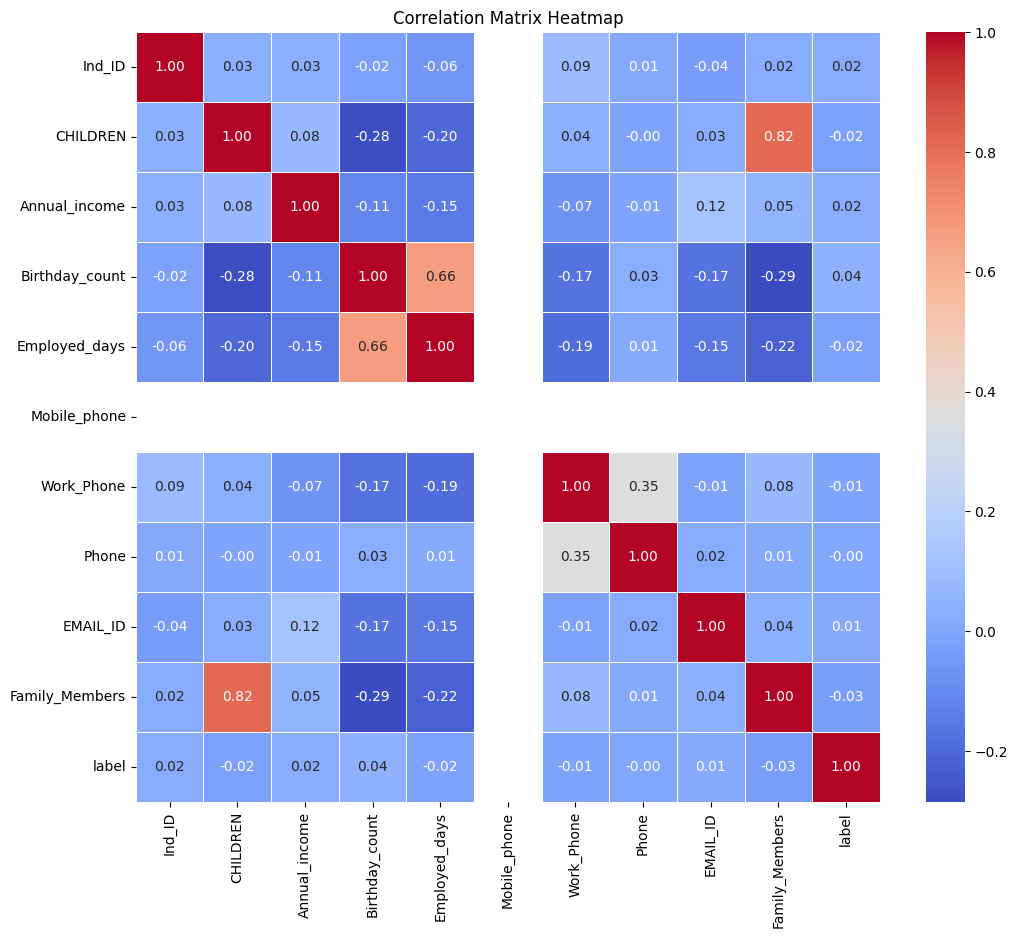

In [ ]:
#checking the correaltion between different columns
dfcorr=data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(dfcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- Feature Encoding


In [ ]:
#preprocessing data to make all the categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
#importing labelencoder to preprocess the data

In [ ]:
#applying to all the columns with object datatypes
le=LabelEncoder()
for column in data:
  if data[column].dtypes == 'object':
    data[column] = data[column].astype(str)
    data[column]=le.fit_transform(data[column])

In [ ]:
#checking the data to see the encoding
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,2,1,1,0,180000.0,1,1,1,1,18772.0,13367.25,1,0,0,0,18,2,1
1,5009744,1,1,0,0,315000.0,0,1,1,1,13557.0,586.00,1,1,1,0,18,2,1
2,5009746,1,1,0,0,315000.0,0,1,1,1,15661.5,586.00,1,1,1,0,18,2,1
3,5009749,1,1,0,0,166500.0,0,1,1,1,13557.0,586.00,1,1,1,0,18,2,1
4,5009752,1,1,0,0,315000.0,0,1,1,1,13557.0,586.00,1,1,1,0,18,2,1


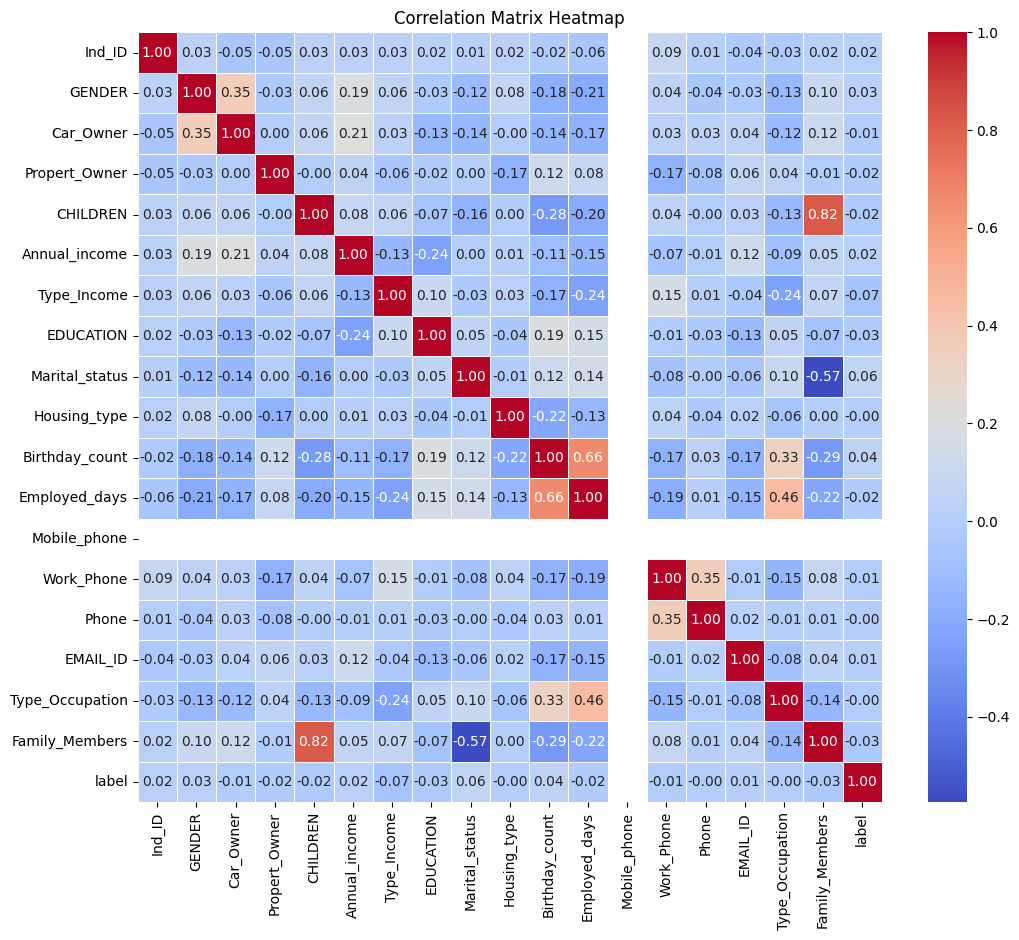

In [ ]:
#checking correlation of all the numeric columns in heatmap
dfcorr=data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(dfcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#removing these columns from data as they are not much  corelated
data= data.drop(['Ind_ID','Mobile_phone','Work_Phone','EMAIL_ID','CHILDREN','Birthday_count','Marital_status','Housing_type'],axis=1)

In [ ]:
data.head(1)

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Employed_days,Phone,Type_Occupation,Family_Members,label
0,2,1,1,180000.0,1,1,13367.25,0,18,2,1


#Feature Scaling

In [ ]:
#scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
#data after scaling
data_scaled

array([[ 1.3011883 ,  1.21686862,  0.72984469, ...,  1.19754369,
        -0.17348002,  2.80102022],
       [-0.73958119,  1.21686862, -1.37015452, ...,  1.19754369,
        -0.17348002,  2.80102022],
       [-0.73958119,  1.21686862, -1.37015452, ...,  1.19754369,
        -0.17348002,  2.80102022],
       ...,
       [ 1.3011883 ,  1.21686862,  0.72984469, ..., -0.14603133,
         2.07377576, -0.35701277],
       [ 1.3011883 ,  1.21686862, -1.37015452, ..., -1.1537126 ,
        -0.17348002, -0.35701277],
       [-0.73958119,  1.21686862,  0.72984469, ...,  1.19754369,
        -0.17348002, -0.35701277]])

In [ ]:
x=data.drop(columns='label')
y=data['label']

#Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y , test_size = 0.2)

In [ ]:
#checking the shape of train data
X_train.shape

(1238, 10)

In [ ]:
#checking the shape of test data
X_test.shape


(310, 10)

In [ ]:

Y_train.shape

(1238,)

In [ ]:
Y_test.shape

(310,)

#MODEL1
- Logistic Regression Classifier

In [ ]:
#importing logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
#fitting train data
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#prediction and accuracy score of the test
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_predict= LR.predict(X_test)

In [ ]:
#model accuracy score
print("Logistic regression training set score ", LR.score(X_train,Y_train))
print("Logistic regression testing set score ", LR.score(X_test,Y_test))
print("Logistic Regression Model accuracy score ", accuracy_score(Y_test,y_predict))

Logistic regression training set score  0.8877221324717286
Logistic regression testing set score  0.8838709677419355
Logistic Regression Model accuracy score  0.8838709677419355


In [ ]:
#importing from libraries for cross validation of model
from sklearn.model_selection import ShuffleSplit
model = LogisticRegression()
s_split = ShuffleSplit(n_splits = 10,test_size=0.25)

In [ ]:
#score after cross validation
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=s_split)
print(results)
print(np.mean(results))

[0.89922481 0.90697674 0.90956072 0.88888889 0.89664083 0.87855297
 0.88888889 0.87596899 0.87596899 0.91472868]
0.8935400516795866


#Model 2
- Descision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = DT.predict(X_test)
print("Decision Tree set score ", DT.score(X_train,Y_train))
print("Decision Tree set score ", DT.score(X_test,Y_test))
print("Decision Tree Classifier Model accuracy score ", accuracy_score(Y_test,y_predict))

Decision Tree set score  0.9838449111470113
Decision Tree set score  0.864516129032258
Decision Tree Classifier Model accuracy score  0.8838709677419355


In [ ]:
model = DecisionTreeClassifier()
s_split = ShuffleSplit(n_splits = 5,test_size=0.20)
results=cross_val_score(model,x,y,cv=s_split)
print(results)
print(np.mean(results))

[0.8483871  0.86774194 0.89032258 0.88387097 0.82580645]
0.863225806451613


#Model 3
- Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred = RF.predict(X_test)
print("Random Forest training set score ", RF.score(X_train,Y_train))
print("Random Forest testing set score ", RF.score(X_test,Y_test))
print("Random Forest Classifier Model accuracy score ", accuracy_score(Y_test,y_predict))

Random Forest training set score  0.9838449111470113
Random Forest testing set score  0.9258064516129032
Random Forest Classifier Model accuracy score  0.8838709677419355


In [ ]:
model = RandomForestClassifier()
s_split = ShuffleSplit(n_splits = 10,test_size=0.25)
results=cross_val_score(model,x,y,cv=s_split)
print(results)
print(np.mean(results))

[0.92248062 0.91989664 0.9121447  0.92764858 0.93023256 0.93023256
 0.93281654 0.9250646  0.91731266 0.88372093]
0.9201550387596897


#Model 4
- KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
Y_knpredict = knn.predict(X_test)
print("KNN training set score ", knn.score(X_train,Y_train))
print("KNN testing set score ", knn.score(X_test,Y_test))
print("KNN Model accuracy score ", accuracy_score(Y_test,y_predict))

KNN training set score  0.907108239095315
KNN testing set score  0.8516129032258064
KNN Model accuracy score  0.8838709677419355


In [ ]:
model = KNeighborsClassifier()
s_split = ShuffleSplit(n_splits = 5,test_size=0.20)
results=cross_val_score(model,x,y,cv=s_split)
print(results)
print(np.mean(results))

[0.87419355 0.87096774 0.88064516 0.86451613 0.88709677]
0.8754838709677418


#Model 5
- Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model_scm_class = SVC()
model_scm_class.fit(X_train,Y_train)

SVC()

In [ ]:
pred = model_scm_class.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.9032258064516129

###Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"C" : [0.1],
             'kernel':['linear','rbf',]}
GSM = GridSearchCV(model_scm_class, param_grid, cv=5)
GSM.fit(X_train,Y_train)
print("parameter", GSM.best_params_)
print("Score", GSM.best_score_)


parameter {'C': 0.1, 'kernel': 'rbf'}
Score 0.882875146924383


#Conclusion

In [ ]:
SCV_accuracy = 0.882875146924383
KNN_accuracy = 0.8754838709677418
RFC_accuracy = 0.9201550387596897
DTC_accuracy = 0.863225806451613
LRC_accuracy = 0.8935400516795866

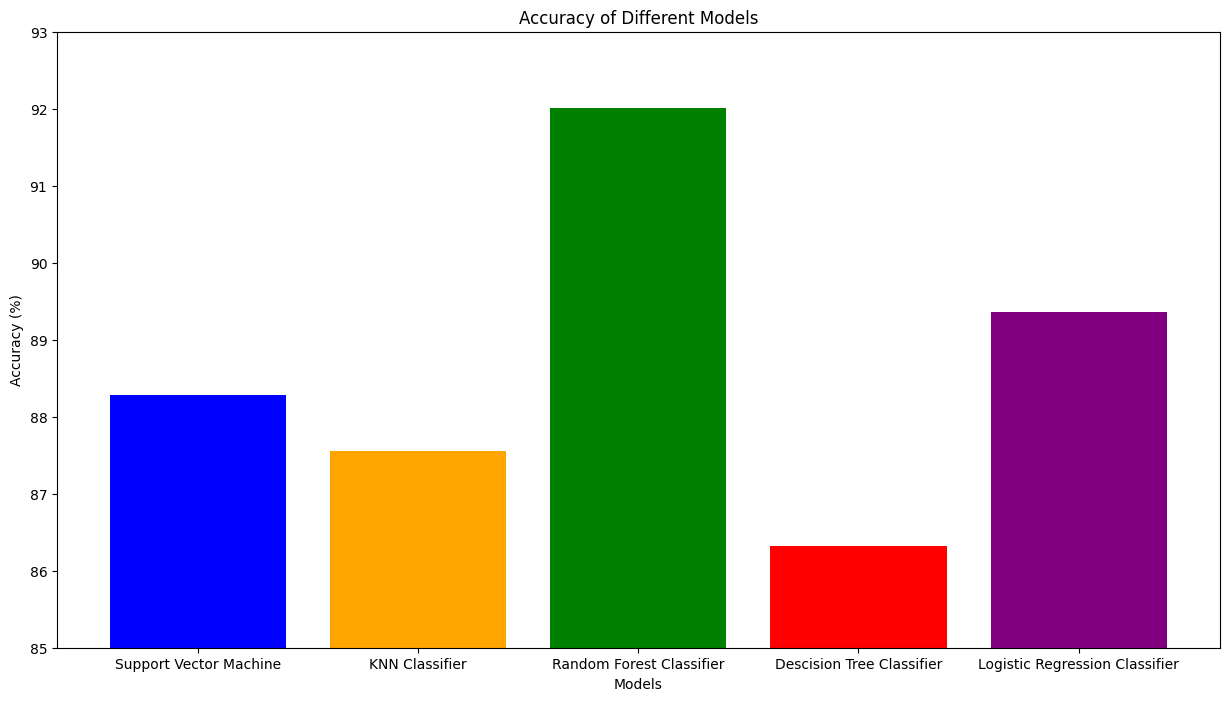

In [ ]:
# Accuracy values

models = ['Support Vector Machine', 'KNN Classifier', 'Random Forest Classifier', 'Descision Tree Classifier', 'Logistic Regression Classifier']
accuracies = [0.882875146924383, 0.8754838709677418, 0.9201550387596897, 0.863225806451613, 0.8935400516795866]

# Convert accuracies to percentages
accuracies_percentage = [accuracy * 100 for accuracy in accuracies]


# Plotting the bar graph
plt.figure(figsize=(15,8))
plt.bar(models, accuracies_percentage, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(85, 93)
plt.show()



After evaluating various models—Support Vector Machine, KNN Classifier, Random Forest Classifier, and Decision Tree Classifier—the Random Forest Classifier demonstrated the highest accuracy at 92.02%. This suggests its suitability for credit card approval prediction. These findings underscore the importance of employing robust models for enhanced predictive accuracy in financial decision-making.